<a href="https://colab.research.google.com/github/yhussain1/MachineLearning/blob/main/PytorchTypeClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

In [ ]:
import pandas as pd

#read csv
df = pd.read_csv("pokemon.csv", delimiter=",")
df.head()

,Name,Type
0,Bulbasaur,GRASS\nPOISON
1,Ivysaur,GRASS\nPOISON
2,Venusaur,GRASS\nPOISON
3,Venusaur\nMega Venusaur,GRASS\nPOISON
4,Charmander,FIRE


In [ ]:
#Split types in two columns

df1 = df['Type'].str.split('\n', 1, expand=True)

In [ ]:
# add new df to df and rename columns

df = df.join(df1).rename(columns={0:'Type1', 1:'Type2'})

In [ ]:
# drop old df

df = df.drop('Type', axis=1)
df.head()

,Name,Type1,Type2
0,Bulbasaur,GRASS,POISON
1,Ivysaur,GRASS,POISON
2,Venusaur,GRASS,POISON
3,Venusaur\nMega Venusaur,GRASS,POISON
4,Charmander,FIRE,None


In [ ]:
from numpy import nan
import numpy as np
import unicodedata
import string


all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
  return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn'
      and c in all_letters
  )

df2 = [unicodeToAscii(x) for x in df['Name']]
df['Name'] = df2

df['Type2'].fillna(df['Type1'], inplace=True)

In [ ]:
df

,Name,Type1,Type2
0,Bulbasaur,GRASS,POISON
1,Ivysaur,GRASS,POISON
2,Venusaur,GRASS,POISON
3,VenusaurMega Venusaur,GRASS,POISON
4,Charmander,FIRE,FIRE
...,...,...,...
1070,BasculegionFemale,WATER,GHOST
1071,Sneasler,POISON,FIGHTING
1072,Overqwil,DARK,POISON
1073,EnamorusIncarnate Forme,FAIRY,FLYING


In [ ]:
# each column contains the first word
df = df.apply(lambda x: x.str.split().str[0])


In [ ]:
# remove dupes
df = df.drop_duplicates(subset='Name', keep="first")

In [ ]:
# identify the types
#df.head(10)
types = df['Type2'].unique().tolist()
df['Type2'].value_counts()

FLYING      118
WATER        93
PSYCHIC      85
NORMAL       82
GRASS        73
FIGHTING     65
FAIRY        57
POISON       55
GROUND       55
FIRE         50
DRAGON       49
STEEL        46
GHOST        46
ELECTRIC     45
DARK         41
ICE          38
ROCK         35
BUG          30
Name: Type2, dtype: int64

In [ ]:
import os
# filename = 'file.txt'

# with open(os.path.join("data/", filename),'w') as f:
#   dfAsString = df['Name'].to_string(header=False, index=False)
#   f.write(dfAsString)

df.loc[df['Type1'] == 'GRASS']
#types

,Name,Type1,Type2
0,Bulbasaur,GRASS,POISON
1,Ivysaur,GRASS,POISON
2,Venusaur,GRASS,POISON
3,VenusaurMega,GRASS,POISON
56,Oddish,GRASS,POISON
...,...,...,...
986,Gossifleur,GRASS,GRASS
987,Eldegoss,GRASS,GRASS
997,Applin,GRASS,DRAGON
998,Flapple,GRASS,DRAGON


In [ ]:
!rm -rf data

In [ ]:
os.mkdir('data')

for i in types:
  with open(os.path.join("data/", i+'.txt'),'w') as f:
#    dfstring = df.loc[df['Type1'] == i].to_string(header=False, index=False) + df.loc[df['Type2'] == i].to_string(header=False, index=False)
#    dfstring = pd.concat([df.loc[df['Type1'] == i], df.loc[df['Type2'] == i]], ignore_index=True, sort=False)
    dfstring = df.loc[df['Type2'] == i]
    dfstring = dfstring['Name'].to_string(index=False)
    f.write(dfstring)


In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob


In [ ]:
def findFiles(path): 
  return glob.glob(path)

path = 'data/*.txt'
print(findFiles(path))

print(unicodeToAscii('Porygon-Z'))
#PorygonZ

def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [line.replace(" ", "") for line in lines]

category_lines = {}
all_categories = []

for filename in findFiles(path):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)

print('# categories:', n_categories, all_categories)

['data/FLYING.txt', 'data/BUG.txt', 'data/GROUND.txt', 'data/NORMAL.txt', 'data/PSYCHIC.txt', 'data/FAIRY.txt', 'data/DRAGON.txt', 'data/FIRE.txt', 'data/ICE.txt', 'data/ELECTRIC.txt', 'data/STEEL.txt', 'data/WATER.txt', 'data/FIGHTING.txt', 'data/GHOST.txt', 'data/ROCK.txt', 'data/GRASS.txt', 'data/POISON.txt', 'data/DARK.txt']
PorygonZ
# categories: 18 ['FLYING', 'BUG', 'GROUND', 'NORMAL', 'PSYCHIC', 'FAIRY', 'DRAGON', 'FIRE', 'ICE', 'ELECTRIC', 'STEEL', 'WATER', 'FIGHTING', 'GHOST', 'ROCK', 'GRASS', 'POISON', 'DARK']


In [ ]:
print(category_lines['BUG'][:5])
#all_letters.find('1')

['Caterpie', 'Metapod', 'Pinsir', 'Pineco', 'Wurmple']


In [ ]:
import torch

# Index each character
def letterToIndex(letter):
  return all_letters.find(letter)

#Convert to tensors
# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

print(letterToTensor('P'))

print(lineToTensor('PorygonZ').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([8, 1, 57])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
# instantiate all modules 
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

# forward function defines network structure

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
# pass an input(current letter Tensor) and previous hidden state
# output is probability of each language
# also gives next hidden state

input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-2.8843, -2.8859, -2.9755, -2.8271, -2.9586, -2.9437, -2.8922, -2.8696,
         -2.7564, -2.8969, -2.9309, -2.9087, -2.9237, -2.9230, -2.9172, -2.8145,
         -2.9576, -2.7921]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
# Better efficiency with using lineToTensor.

input = lineToTensor('Long')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
output.topk(1)

tensor([[-2.9402, -2.8788, -2.8956, -2.8980, -2.9170, -2.9561, -2.8716, -2.8184,
         -2.8874, -2.8197, -2.9240, -2.8718, -2.8845, -2.9679, -2.8444, -2.8457,
         -2.9777, -2.8475]], grad_fn=<LogSoftmaxBackward0>)


torch.return_types.topk(
values=tensor([[-2.8184]], grad_fn=<TopkBackward0>),
indices=tensor([[7]]))

In [ ]:
# Interpret output of network
# .topk gets the index of the greatest value

def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(categoryFromOutput(output))

('FIRE', 7)


In [ ]:
import random
l = 'GRASS'
l[random.randint(0, len(l) - 1)]
len(all_categories)

18

In [ ]:
import random

#training example
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = WATER / line = Poliwag
category = FIRE / line = Salandit
category = STEEL / line = ZacianCrowned
category = NORMAL / line = Snorlax
category = STEEL / line = Magneton
category = PSYCHIC / line = MeowsticMale
category = FIGHTING / line = Pignite
category = FIRE / line = Braixen
category = POISON / line = Weezing
category = FIRE / line = Flareon


In [ ]:
# negative log likelihood loss as trains classification problem
# last layer is LogSoftMax so works well with it
criterion = nn.NLLLoss()

In [ ]:
learning_rate = 0.006 # If you set this too high, it might explode. If too low, it might not learn

# input target tensors
def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()

# zero initial hidden state
  rnn.zero_grad()

# read each letter in then keep hidden state for next letter
  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

# compare output to target
  loss = criterion(output, category_tensor)
  loss.backward()

# Add parameters' gradients to their values, multiplied by learning rate
  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

    # Print iter number, loss, name and guess
  if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0

5000 5% (0m 6s) 3.1437 AbomasnowMega / PSYCHIC ✗ (ICE)
10000 10% (0m 18s) 2.6364 Raikou / FIGHTING ✗ (ELECTRIC)
15000 15% (0m 28s) 2.4581 Tyranitar / NORMAL ✗ (DARK)
20000 20% (0m 37s) 3.2966 Numel / POISON ✗ (GROUND)
25000 25% (0m 44s) 1.9337 Beartic / ICE ✓
30000 30% (0m 51s) 0.0926 Rolycoly / ROCK ✓
35000 35% (0m 58s) 1.4380 Haxorus / DRAGON ✓
40000 40% (1m 5s) 2.1471 Nidorina / PSYCHIC ✗ (POISON)
45000 45% (1m 12s) 2.1525 Victini / NORMAL ✗ (FIRE)
50000 50% (1m 18s) 1.9688 PidgeotMega / STEEL ✗ (FLYING)
55000 55% (1m 25s) 3.3286 Goomy / GROUND ✗ (DRAGON)
60000 60% (1m 32s) 6.9135 LycanrocMidnight / DARK ✗ (ROCK)
65000 65% (1m 39s) 3.6751 Shellder / GHOST ✗ (WATER)
70000 70% (1m 46s) 1.8542 Alcremie / GRASS ✗ (FAIRY)
75000 75% (1m 54s) 2.9601 WormadamPlant / GROUND ✗ (GRASS)
80000 80% (2m 2s) 2.3036 Dewgong / DRAGON ✗ (ICE)
85000 85% (2m 11s) 0.2612 Greninja / DARK ✓
90000 90% (2m 18s) 5.1258 Bruxish / POISON ✗ (PSYCHIC)
95000 95% (2m 25s) 1.5390 Glameow / NORMAL ✓
100000 100% (2m 3

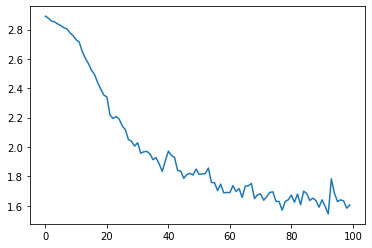

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

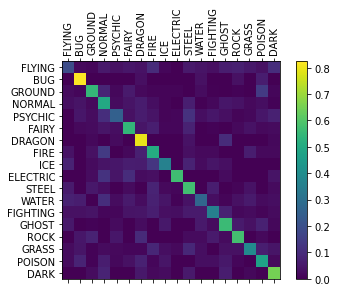

In [ ]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [ ]:
def predict(input_line, n_predictions=3):
  print('\n> %s' % input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    # Get top N categories
    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f) %s' % (value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

predict('Sprigatito')
predict('Fuecoco')
predict('Quaxly')


> Sprigatito
(-0.33) ROCK
(-2.39) FLYING
(-2.86) PSYCHIC

> Fuecoco
(-0.48) BUG
(-1.74) ICE
(-3.02) WATER

> Quaxly
(-0.56) ELECTRIC
(-1.37) ROCK
(-3.08) DRAGON


In [ ]:
predict('Callum')
predict('Beatrice')
predict('Daniel')
predict('Una')
predict('Liam')
predict('Yahya')
predict('Lukas')
predict('Ash')
predict('Louis')


> Callum
(-1.47) DRAGON
(-1.56) FIRE
(-2.40) GRASS

> Beatrice
(-0.97) ICE
(-1.55) PSYCHIC
(-2.34) GROUND

> Daniel
(-1.62) FIRE
(-1.81) GHOST
(-1.95) STEEL

> Una
(-1.75) FIRE
(-1.76) DARK
(-1.82) PSYCHIC

> Liam
(-1.18) PSYCHIC
(-2.18) FLYING
(-2.31) GRASS

> Yahya
(-1.41) GHOST
(-2.02) WATER
(-2.22) FIGHTING

> Lukas
(-1.11) FIGHTING
(-1.48) GRASS
(-2.29) FIRE

> Ash
(-1.33) POISON
(-1.66) STEEL
(-2.44) NORMAL

> Louis
(-1.40) ICE
(-1.58) GRASS
(-2.26) PSYCHIC


In [ ]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size

    self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
    self.o2o = nn.Linear(hidden_size + output_size, output_size)
    self.dropout = nn.Dropout(0.1)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, category, input, hidden):
    input_combined = torch.cat((category, input, hidden), 1)
    hidden = self.i2h(input_combined)
    output = self.i2o(input_combined)
    output_combined = torch.cat((hidden, output), 1)
    output = self.o2o(output_combined)
    output = self.dropout(output)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

In [ ]:
# Get a random category and random line from that category
def randomTrainingPair():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  return category, line

# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)

In [ ]:
# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [ ]:
# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [ ]:
criterion = nn.NLLLoss()

learning_rate = 0.0005

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)

In [ ]:
rnn = RNN(n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for iter in range(1, n_iters + 1):
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 17s (5000 5%) 3.5781
0m 33s (10000 10%) 2.9498
0m 50s (15000 15%) 2.3452
1m 7s (20000 20%) 2.1457
1m 25s (25000 25%) 2.4147
1m 43s (30000 30%) 2.4777
1m 59s (35000 35%) 2.3347
2m 16s (40000 40%) 3.0358
2m 33s (45000 45%) 2.7962
2m 50s (50000 50%) 2.5603
3m 6s (55000 55%) 3.0319
3m 23s (60000 60%) 2.3332
3m 39s (65000 65%) 2.8229
3m 56s (70000 70%) 2.8891
4m 13s (75000 75%) 2.4833
4m 29s (80000 80%) 2.2982
4m 46s (85000 85%) 1.9092
5m 3s (90000 90%) 2.0026
5m 19s (95000 95%) 2.3186
5m 36s (100000 100%) 2.5846


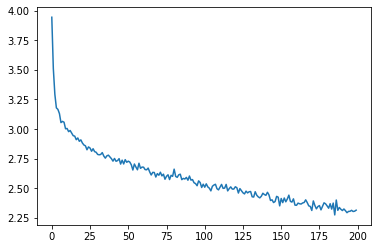

In [ ]:
plt.figure()
plt.plot(all_losses)

In [ ]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('FAIRY', 'RUS')

samples('DRAGON', 'GER')

samples('STEEL', 'SPA')

samples('POISON', 'CHI')

Raticuri
Urimeria
Sanituree
Gragrian
Elega
Ragoru
Sandor
Parishiona
Aloron
Conedin
Hisuia
Ingilu
